# 데이터 로드

In [ ]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

# 데이터 로드

In [ ]:
# 스팀 게임 리뷰 데이터 다운 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f37dd1fcb50>)

In [ ]:
# 판다스로 각 파일데이터를  train/test 변수에 바인딩
total_data = pd.read_table('ratings_total.txt')

In [ ]:
# 훈련 데이터 내용 확인
total_data[:] # 상위 5개 출력

,0,노래가 너무 적음
0,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
1,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
2,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
3,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
4,1,역시 재미있네요 전작에서 할수 없었던 자유로운 덱 빌딩도 좋네요^^
...,...,...
99994,0,한글화해주면 10개산다
99995,0,개쌉노잼 ㅋㅋ
99996,0,노잼이네요... 30분하고 지웠어요...
99997,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [ ]:
# 열 제목 추가
total_data = pd.read_table('ratings_total.txt', names=['label', 'document'],)
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 100000


In [ ]:
# 훈련 데이터 내용 확인
total_data[:] # 상위 5개 출력

,label,document
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [ ]:
 # shuffling
total_data = total_data.sample(frac=1).reset_index(drop=True) 
total_data[:5]

,label,document
0,1,1. 서쪽 드래곤 유적에가면 드래곤이 나타나지도않는데 이벤트CG가 뜬다 (그냥 뜨기...
1,0,진짜 다른건 플레이를 별로 안해봐서 모르겟는데 AI가 너무 끔찍할정도로 멍청함 난 ...
2,0,이거살바에 돈(조금?) 더모아서 GTA5를 사는게 답입니다
3,1,와 내가 시간은 존나 많은데 할게 같이 없네 할 때 하는게 이 게임이다 필살기 같은...
4,0,Not that fun.... 별로...


# 데이터 클렌징

In [ ]:
# 중복 데이터 체크
total_data['document'].nunique(), total_data['label'].nunique()

(99892, 2)

In [ ]:
# 중복 데이터 제거
total_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [ ]:
# 중복 샘플 제거 확인
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 99892


In [ ]:
# NULL값 유무 체크
print(total_data.isnull().values.any())

False


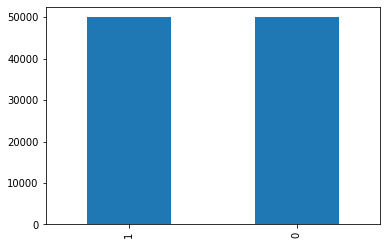

In [ ]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  49943
1      1  49949


# 데이터 정규화

In [ ]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
total_data['document'] = total_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data[:5]

,label,document
0,1,서쪽 드래곤 유적에가면 드래곤이 나타나지도않는데 이벤트가 뜬다 그냥 뜨기만하고 아...
1,0,진짜 다른건 플레이를 별로 안해봐서 모르겟는데 가 너무 끔찍할정도로 멍청함 난 보통...
2,0,이거살바에 돈조금 더모아서 를 사는게 답입니다
3,1,와 내가 시간은 존나 많은데 할게 같이 없네 할 때 하는게 이 게임이다 필살기 같은...
4,0,별로


In [ ]:
# 공백만 남은 데이터를 넓값으로 바꾸고 개수를 체크하자
total_data['document'] = total_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
total_data['document'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

label       0
document    0
dtype: int64


# 정제&정규화한 데이터 파일로 저장

In [ ]:
total_data.to_csv('steam_game_review_total_data.txt', index=False, sep='\t')